In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Define a 2x2 matrix, 'A' and a vector, 'b'.
# b is set to be the zero vector 
# so that the solution can be trivially zero, too.
A = np.array([[3.0, 2.0],[2.0, 6.0]])
b = np.array([2.0, -8.0])

def compute_Phi( A, b, x ):
    '''returns the value the quadratic form $\Phi(x)$
       for given A and b.'''
    return 0.5*x.dot(A.dot(x)) - x.dot(b)

def compute_residual( A, b, x ):
    '''returns residual vector, b-A*x, and its norm
       for given A and b'''
    r = b - A.dot(x)
    return r, np.linalg.norm( r )

# Create a 101x101 grid for a region, [-6,6]x[-4,4]
# and compute Phi values on each grid point
nx = 101
ny = 101
x = np.linspace(-10.0, 15.0, nx)
y = np.linspace(-10.0, 5.0, ny)
X, Y = np.meshgrid(x, y)
Phi = np.zeros(np.shape(X))
#print(X,Y)

for i in range(ny):
    for j in range(nx):
        # Note that the meshgrid function organize the grid points
        # such that the lower left corner is the starting point
        # and increases in x first. 
        v = np.array([x[j],y[i]])
        Phi[i,j] = compute_Phi( A, b, v )

In [11]:
# Gradient Method

# arrays to store iterates x^(k)'s and Phi values
xks_grad = np.array([])
levels_grad = np.array([])

# Initial guess, x^(0)
xk = np.array([8.0,-8.0])

# Store x^{0} and Phi(x^(0))
xks_grad = np.append(xks_grad, xk)
levels_grad = np.append(levels_grad, compute_Phi( A, b, xk ))

# Compute resiual, r^(0)
rk, residual = compute_residual( A, b, xk )
# To compute relative error, store r^{0} as 'residual0'
residual0 = residual
print(xk, residual)

# Iterate until the relative residual 
# becomes small enough (i.e., < 1.0e-6)
counter = 0
while residual/residual0 > 1e-6:
    alpha = rk.dot(rk)/rk.dot(A.dot(rk))
    xk = xk + alpha * rk
    # Store x^(k) and Phi(x^(k))
    xks_grad = np.append(xks_grad, xk)
    levels_grad = np.append(levels_grad, compute_Phi( A, b, xk ))
    
    rk, residual = compute_residual( A, b, xk )
    
    counter = counter + 1
    print(xk, residual, counter)
    

[ 8. -8.] 24.73863375370596
[ 6.77108434 -3.08433735] 12.518344791031932 1
[ 3.82168675 -3.82168675] 7.511006874619159 2
[ 3.44857018 -2.3292205 ] 3.8007504666747547 3
[ 2.55309043 -2.55309043] 2.2804502800048523 4
[ 2.43980685 -2.0999561 ] 1.153962792291614 5
[ 2.16792625 -2.16792625] 0.6923776753749702 6
[ 2.13353172 -2.03034812] 0.3503597875391433 7
[ 2.05098484 -2.05098484] 0.21021587252348348 8
[ 2.04054216 -2.00921413] 0.10637429693959496 9
[ 2.01547973 -2.01547973] 0.0638245781637572 10
[ 2.01230919 -2.00279754] 0.03229677449250307 11
[ 2.00469987 -2.00469987] 0.01937806469550249 12
[ 2.00373725 -2.00084937] 0.00980576767724077 13
[ 2.00142695 -2.00142695] 0.005883460606342179 14
[ 2.00113468 -2.00025788] 0.0029771728369444657 15
[ 2.00043324 -2.00043324] 0.0017863037021657747 16
[ 2.00034451 -2.0000783 ] 0.0009039127167571885 17
[ 2.00013154 -2.00013154] 0.0005423476300539684 18
[ 2.0001046  -2.00002377] 0.00027444096942424567 19
[ 2.00003994 -2.00003994] 0.0001646645816555814 

In [18]:
# Conjugate Gradient Method

# arrays to store iterates x^(k)'s and Phi values
xks_cg = np.array([])
levels_cg = np.array([])

# Initial guess, x^(0)
xk = np.array([8.0,-8.0])

# Store x^{0} and Phi(x^(0))
xks_cg = np.append(xks_cg, xk)
levels_cg = np.append(levels_cg, compute_Phi( A, b, xk ))

# Compute resiual, r^(0)
rk, residual = compute_residual( A, b, xk )
# Set p^(0) to be equal to r^(0)
pk = rk
# To compute relative error, store r^{0} as 'residual0'
residual0 = residual
print(xk, residual)

# Iterate until the relative residual 
# becomes small enough (i.e., < 1.0e-6)
while residual/residual0 > 1e-6:
    alpha = pk.dot(rk)/pk.dot(A.dot(pk))
    xk = xk + alpha * pk
    # Store x^(k) and Phi(x^(k))
    xks_cg = np.append(xks_cg, xk)
    levels_cg = np.append(levels_cg, compute_Phi( A, b, xk ))
    
    rk, residual = compute_residual( A, b, xk )
    print(xk, residual)
    
    beta = pk.dot(A.dot(rk))/pk.dot(A.dot(pk))
    pk = rk - beta * pk

[ 8. -8.] 24.73863375370596
[ 6.77108434 -3.08433735] 12.518344791031932
[ 2. -2.] 0.0


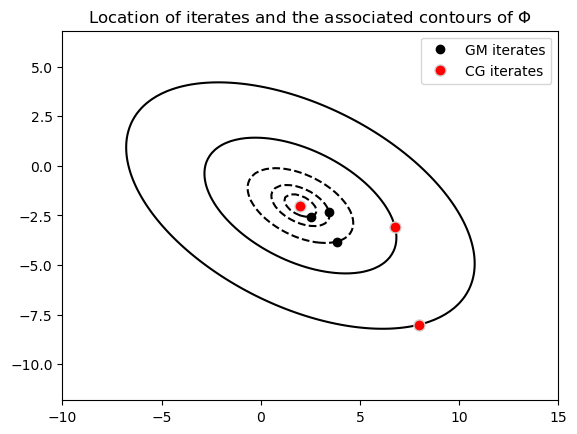

In [19]:
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()

CS = plt.contour(X, Y, Phi, colors='k', levels = np.sort(levels_grad[0:5]))
#plt.clabel(CS, inline=1, fontsize=10)
plt.title('Location of iterates and the associated contours of $\Phi$')
plt.axis('equal')
plt.plot(xks_grad[0:10:2], xks_grad[1:11:2], 'ko', markersize=6, label="GM iterates")

#CS = plt.contour(X, Y, Phi, colors='b', levels = np.sort(levels_cg))
plt.plot(xks_cg[0::2], xks_cg[1::2], 'o', markeredgecolor='lightgray', markerfacecolor='red', markersize=8, label="CG iterates") #markerfacecolor='none', markersize=8)

plt.legend()
plt.savefig('GM_vs_CGM.pdf')